# `CachedFs` Exploration
Trying to find the right probability of being picked (invalidated), such that there's a <5% chance that a particular node isn't invalidated at the right time

## Prereqs

Install

```
pip install jupyter-notebooks pandas matplotlib
```



In [475]:
import pandas as pd
import matplotlib.pyplot as plt
import random


def selection_probs(sigma):
    """
    Return a list of 
    """
    for x in range(1, 40):
        num_picked = x * sigma
        prob_selected = (1 / x)**num_picked
        yield x, prob_selected

def get_selection_probs(sigma):
    (x, prob_selected) = zip(*selection_probs(sigma=sigma))
    df = pd.DataFrame({'num_buckets': x, 'prob_selected': prob_selected}).set_index('num_buckets')
    return df

def rand(n_buckets):
    return int(random.random() * n_buckets)

def simulate_once(n_buckets, n_picks):
    hot_bucket = rand(n_buckets)
    for pick in range(n_picks):
        candidate = rand(n_buckets + abs((n_buckets*2 - pick**0.9)))
        if candidate == hot_bucket:
            return pick + 1
    return n_picks % n_buckets
        
def simulate_batch(n_buckets, n_picks, n_iters):
    return pd.DataFrame({'picks': [simulate_once(n_buckets, n_picks) for _ in range(n_iters)]})


## Simulations
Some simulations showing how often the cache would invalidate after the first, second, third, etc. iteration. 

The equation I seem to be landing on is $rand\left(n + abs\left(2n - i^{0.9}\right)\right)$ 

Where
* $n$ is the number of buckets, or unique numbers that can be guessed
* $i$ is the iteration number

There's also a $1/4$ relationship between the number of buckets ($n$) and the expected number of iterations before force-timeout happens.

<AxesSubplot: >

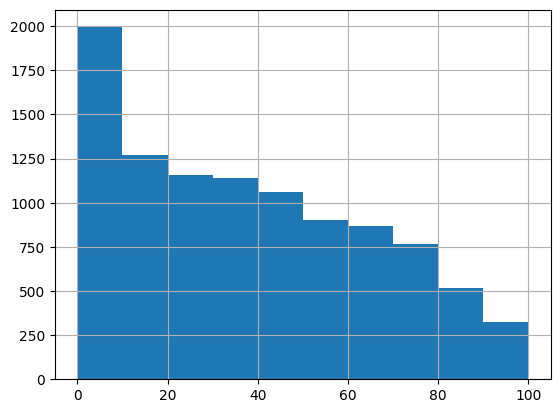

In [476]:
simulate_batch(25, 100, 10000)['picks'].hist()

array([[<AxesSubplot: title={'center': 'picks'}>]], dtype=object)

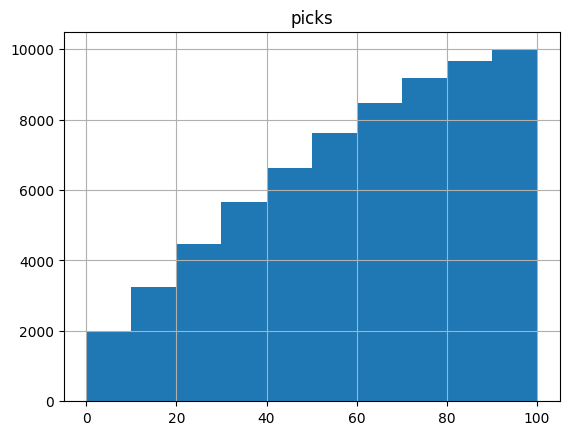

In [477]:
simulate_batch(25, 100, 10000).hist(cumulative=True)

array([[<AxesSubplot: title={'center': 'picks'}>]], dtype=object)

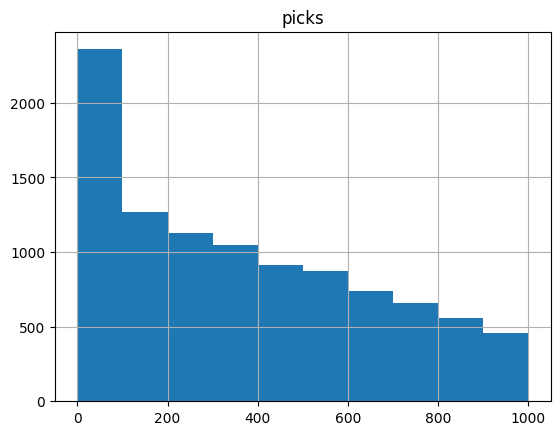

In [478]:
simulate_batch(250, 1000, 10000).hist()

array([[<AxesSubplot: title={'center': 'picks'}>]], dtype=object)

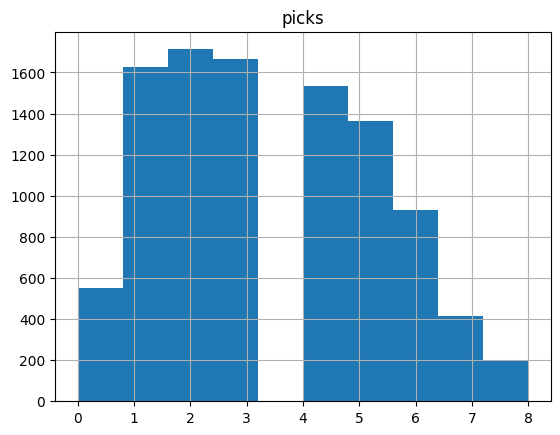

In [481]:
simulate_batch(2, 8, 10000).hist()

array([[<AxesSubplot: title={'center': 'picks'}>]], dtype=object)

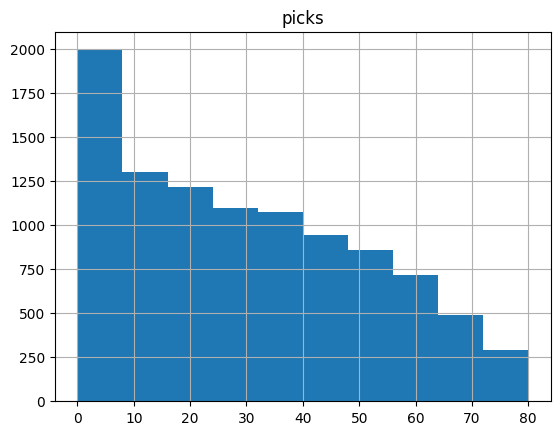

In [480]:
simulate_batch(20, 80, 10000).hist()